In [9]:
# K-Ortalamaları (K-Means) Denetimsiz Öğrenme 

# Amaç -> Gözlemleri birbirine olan benzerliklerine göre kümelere ayırmaktır.

# 1 -> Küme sayısı belirlenir.
# 2 -> Rastgele k merkez seçilir.
# 3 -> Her bir gözlem için k merkezlere uzaklıklar hesaplanır.
# 4 -> Her gözlem en yakın olduğu merkeze yani kümeye atanır.
# 5 -> Atama işlemlerinden sonra oluşan oluşan kümeler için tekrar merkez hesaplamaları yapılır.
# 6 -> Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının minimum olduğu
# durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

# Önce rastgele atamış olduğu merkezleri değiştirerek merkezin nerede olması gerektiğine karar verir.
# Merkezin nerede olması gerektiğini matematiksel bir şekilde SSE, SSR değerlerine bakarak değerlendirir ve seçer.

In [19]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#!pip install yellowbrick
#from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.decomposition import PCA
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()
# df.isnull().sum() -> Boş değer yok
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
# Uzaklık temelli bir yol izlyeceğiz, bundan dolayı verileri standartlaştırmak gerekiyor.
sc = MinMaxScaler((0,1))
df = sc.fit_transform(df)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [10]:
kmeans = KMeans(n_clusters=4,random_state=17).fit(df)
kmeans.get_params()

C:\Users\sefa.erkan\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sefa.erkan\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
# Küme sayısı
kmeans.n_clusters

4

In [12]:
# Küme merkezleri
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [14]:
# Küme etiketleri, 4 etiket var 0 ilk küme, 3 son küme
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [16]:
# En yakın class'lara olan uzaklıklar
kmeans.inertia_

3.683456153585914

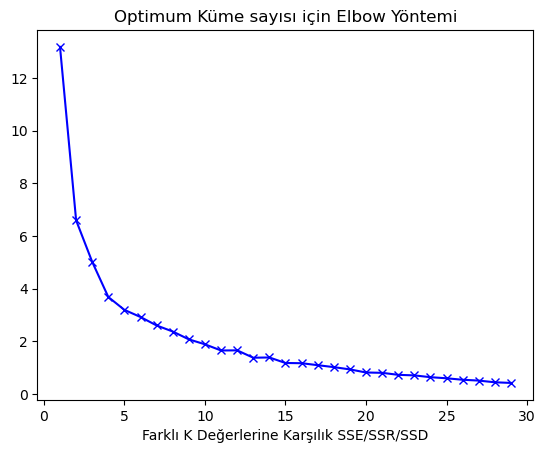

In [25]:
###############################
# Optimum Küme Sayısı Belirleme
###############################
kmeans = KMeans()
ssd = []
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)
    
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

In [ ]:
# Optimum noktayı daha spesifik belirler
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20))
elbow.fit(df)
elbow.show()
# 5 küme olarak belirledi

In [ ]:
###################################
# Final Cluster'ların Oluşturulması
###################################
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [ ]:
kmeans.n_clusters
kmeans.cluster_centers_
kmeans.labels_
df[0:5]

In [ ]:
# Hangi eyalet hangi cluster'da onu yaptık.
clusters = kmeans.labels_

df = pd.read_csv("USArrests.csv",index_col=0)

df["clusters"] = clusters

df.head()